# STOP!!! READ THIS FIRST

You should only look at these solutions once you think you have working solutions of your own :).

# Section 7 - 2D Uncertainties

Sometimes you have errors not only in the $y$ direction but also in $x$. What do?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline
plt.rc("text", usetex=True)
plt.rc("font", size=24)
plt.rc("errorbar", capsize=3)

## Exercise 13 - Standard method

Here we use the "standard" method of doing a linear fit to data with 2D uncertanties, which is to model the angle of the line and the orthogonal offset of the points instead of the slope and intercept.

[ 0.67] [ 9.] [ 15.]
[-21.0335324]


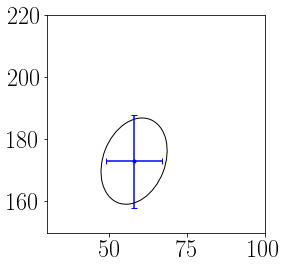

In [76]:
#Get the data. We only want x, y and the error on y
_, x_all, y_all, sigy_all, sigx_all, rxy_all = np.genfromtxt("data.txt", unpack=True, delimiter='&', skip_header=1)
sigxy_all = rxy_all*sigy_all*sigx_all #The covariance instead of the correlation
N_data = len(x_all)
def get_all_data():
    return x_all, y_all, sigy_all, sigx_all, sigxy_all, rxy_all

def get_good_data():
    #Points 4 onward
    return x_all[4:], y_all[4:], sigy_all[4:], sigx_all[4:], sigxy_all[4:], rxy_all[4:]

def get_bad_data():
    #Points 0 through 3
    return x_all[:4], y_all[:4], sigy_all[:4], sigx_all[:4], sigxy_all[:4], rxy_all[:4]


#Make a function that draws ellipses
inds = np.array([1])
x, y, sigy, sigx, sigxy, rxy = np.array(get_good_data())[:,inds]

def draw_ellipses(x, y, sigx, sigy, r):
    angles = -np.arcsin(r)/2* 180/np.pi
    print r, sigx, sigy
    #angles*=0
    angles+=0
    print angles
    widths  = 2*sigx
    heights = 2*sigy
    widths  = 2*np.sqrt((sigx*np.cos(angles*np.pi/180))**2 + (sigy*np.sin(angles*np.pi/180))**2)
    heights = 2*np.sqrt((sigx*np.sin(angles*np.pi/180))**2 + (sigy*np.cos(angles*np.pi/180))**2)

    plt.errorbar(x, y, xerr=sigx, yerr=sigy, c='b', marker='.', ls='')
    ells = [Ellipse(xy=(x[i],y[i]), width=widths[i], height=heights[i], angle=angles[i], fill=False)\
            for i in xrange(len(x))]
    for e in ells:
        plt.gca().add_artist(e)
    return
draw_ellipses(x, y, sigx, sigy, rxy)    
plt.xlim(30, 100)
plt.ylim(150, 220)
#plt.xlim(0, 300)
#plt.ylim(0, 700)
plt.axes().set_aspect('equal')